# Import libs and dataset

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [76]:
jobs_df = pd.read_csv('DataStore/jobData.csv',error_bad_lines=False)

C:\Users\jkwia\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3460: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 153: expected 6 fields, saw 11\n'


# Dataset info

In [77]:
jobs_df[:25]

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies
0,Embedded Software Engineer,Fluke Corportaion,mid,13000 18000,"{'C': 'regular', 'C++': 'regular', 'Linux': 'r...",-
1,Azure Platform Engineer (AI Department),Procter & Gamble,mid,-,"{'Microsoft Azure': 'advanced', 'Python': 'adv...",-
2,.NET Developer,UN7,mid,20000 28000,{'.Net': 'advanced'},-
3,Spec. Projektant Robotyzacji Procesów,Credit Agricole Bank Polska S.A.,mid,-,"{'C#': 'regular', 'VB.Net': 'regular', 'Java':...",-
4,HT Functional Consultant with ERP Industry Sol...,Accenture,mid,-,"{'English': 'master', 'ERP': 'advanced', 'Prob...",-
5,Cloud Access Technology Consultant all levels,Accenture,mid,-,"{'JavaScript': 'master', 'Docker': 'advanced',...",-
6,XR Developer,Accenture,mid,-,"{'C#': 'master', 'Unity': 'master', 'VR Tools'...",-
7,Fullstack .NET/Angular Developer,Accenture,senior,-,"{'C#': 'master', '.Net': 'master', 'Angular': ...",-
8,Technology M&A Consultant,Accenture,mid,-,"{'Merger&Acquistion': 'advanced', 'Enterprise ...",-
9,Data Visualization Consultant all levels,Accenture,mid,-,"{'Data': 'regular', 'Power BI': 'regular', 'SQ...",-


In [78]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Position               853 non-null    object
 1   Company                853 non-null    object
 2   Experience             745 non-null    object
 3   Salary                 853 non-null    object
 4   Used Technologies      549 non-null    object
 5   Optional Technologies  300 non-null    object
dtypes: object(6)
memory usage: 40.1+ KB


# Salary analysis

In [87]:
type(jobs_df['Salary'][0])

str

In [135]:
def convert_data(row):
    cell = row['Salary']
    index = row.name  # row.name zawiera indeks wiersza
    try:
        parts = cell.split()
        valid_parts = [part for part in parts if part != '-' and part.strip() != '']
        int_values = [int(part) for part in valid_parts]

        return int_values
    except (ValueError, TypeError):
        print(f"In row {index} problem with cell: \"{cell}\". Inserted []")
        return []

In [136]:
jobs_df['Salary_INT'] = jobs_df.apply(convert_data, axis=1)
jobs_df['Salary_INT']

In row 63 problem with cell: "28000 B2B". Inserted []
In row 403 problem with cell: "100 120zł/ godz. (zal. od umowy)". Inserted []
In row 509 problem with cell: "9000zł netto (+". Inserted []
In row 669 problem with cell: "40 60zł/ godz. (zal. od umowy)". Inserted []


0      [13000, 18000]
1                  []
2      [20000, 28000]
3                  []
4                  []
            ...      
848                []
849    [18568, 21456]
850    [19000, 28000]
851    [20000, 25000]
852    [16000, 25000]
Name: Salary_INT, Length: 853, dtype: object

In [129]:
jobs_df[jobs_df['Salary'].str.contains('B2B|godz|netto')]

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies,Salary_INT
63,IT Project Manager with German,NATEK,senior,28000 B2B,"{'German': 'master', 'Project Management': 'ma...",-,None
403,Senior Python Engineer,BCF Software Sp. z o.o.,NaN,100 120zł/ godz. (zal. od umowy),NaN,NaN,None
509,IT Support Engineer,Platige Image S.A.,Mid,9000zł netto (+,NaN,NaN,None
669,Trener Programowania dla dzieci i młodzieży,Giganci Programowania sp. z o.o.,NaN,40 60zł/ godz. (zal. od umowy),NaN,NaN,None


In [130]:
jobs_df.loc[[63,403,509,669],['Company','Salary']]

,Company,Salary
63,NATEK,28000 B2B
403,BCF Software Sp. z o.o.,100 120zł/ godz. (zal. od umowy)
509,Platige Image S.A.,9000zł netto (+
669,Giganci Programowania sp. z o.o.,40 60zł/ godz. (zal. od umowy)


In [139]:
def calculate_average(salary_list):
    if not salary_list or all(salary is None for salary in salary_list):
        return None
    valid_salaries = [salary for salary in salary_list if salary is not None]
    return np.mean(valid_salaries)

In [149]:
jobs_df['Salary_Avg'] = jobs_df['Salary_INT'].apply(calculate_average)

In [148]:
jobs_df.loc[:,['Position','Salary', 'Salary_Avg','Company']]

,Position,Salary,Salary_Avg,Company
0,Embedded Software Engineer,13000 18000,15500.0,Fluke Corportaion
1,Azure Platform Engineer (AI Department),-,NaN,Procter & Gamble
2,.NET Developer,20000 28000,24000.0,UN7
3,Spec. Projektant Robotyzacji Procesów,-,NaN,Credit Agricole Bank Polska S.A.
4,HT Functional Consultant with ERP Industry Sol...,-,NaN,Accenture
...,...,...,...,...
848,Architekt systemowy,-,NaN,ALTEN Polska
849,Remote Python Developer,18568 21456,20012.0,SQ3 Partners
850,Cloud DevOps,19000 28000,23500.0,Hitachi Energy
851,Kubernetes Engineer,20000 25000,22500.0,C.H. Robinson


## Salary analysis taking into account experience

In [156]:
jobs_df['Experience'].unique()

array(['mid', 'senior', 'junior', 'Senior', 'Mid', nan, 'Junior',
       'expert', 'manager / supervisor', 'team manager', 'ekspert',
       'kierownik / koordynator', 'trainee',
       'manager / supervisor, team manager', 'menedżer',
       'kierownik / koordynator, menedżer', 'entry level & blue collar',
       'trainee, assistant', 'dyrektor'], dtype=object)

In [163]:
jobs_df['Experience'].fillna('Missing', inplace = True)

In [164]:
jobs_df['Experience'].value_counts()

Mid                                   424
Senior                                116
Missing                               108
mid                                    49
Junior                                 40
senior                                 38
manager / supervisor                   15
junior                                 13
kierownik / koordynator                11
team manager                            8
ekspert                                 7
expert                                  6
trainee                                 5
manager / supervisor, team manager      4
menedżer                                4
kierownik / koordynator, menedżer       2
entry level & blue collar               1
trainee, assistant                      1
dyrektor                                1
Name: Experience, dtype: int64

In [165]:
jobs_df[jobs_df['Salary_Avg'].notna()   & (~jobs_df['Experience'].isin(['senior','Senior', 'mid','Mid','Senior','expert','ekspert','dyrektor','menedżer','manager / supervisor', 'manager / supervisor, team manager', 'kierownik / koordynator','kierownik / koordynator, menedżer']))]

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies,Salary_INT,Salary_Avg
92,Software Architect,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
93,Software Developer C++ / Linux / Buildroot,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
94,Embedded Software Developer with focus on Imag...,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
95,React Senior Developer,AppVelocity Inc,Missing,18000 28000,NaN,NaN,"[18000, 28000]",23000.0
100,SAP Basis Engineer for System Integration,CSHARK sp. z o.o.,Missing,24000 33500,NaN,NaN,"[24000, 33500]",28750.0
105,Junior .NET Developer,EMPLO sp. z o.o.,Junior,4000 10000,"C#, ASP.NET MVC, Entity Framework, SQL, .NET, ...","React.js, TypeScript, CSS, HTML","[4000, 10000]",7000.0
109,Technical Support Specialist I with French/Spa...,JAMF,Missing,8750 11000,NaN,NaN,"[8750, 11000]",9875.0
114,Junior IT Specialist,Catalogic Software,Junior,5000 9000,NaN,NaN,"[5000, 9000]",7000.0
117,Młodszy Specjalista ds. IT,Prime Engineering Poland,Junior,5000 8000,NaN,NaN,"[5000, 8000]",6500.0
203,Data Engineer,ITDS Polska Sp. z o.o.,Missing,18900 24150,NaN,NaN,"[18900, 24150]",21525.0


In [166]:
jobs_df[(jobs_df['Salary_Avg'] > 10000) & (~jobs_df['Experience'].isin(['senior','Senior', 'mid','Mid','Senior','expert','ekspert','dyrektor','menedżer','manager / supervisor', 'manager / supervisor, team manager', 'kierownik / koordynator','kierownik / koordynator, menedżer']))] #jobs_df['Salary_Avg'].notna() &

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies,Salary_INT,Salary_Avg
92,Software Architect,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
93,Software Developer C++ / Linux / Buildroot,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
94,Embedded Software Developer with focus on Imag...,Recruit Europe Sp.zo.o.,Missing,28000 41000,NaN,NaN,"[28000, 41000]",34500.0
95,React Senior Developer,AppVelocity Inc,Missing,18000 28000,NaN,NaN,"[18000, 28000]",23000.0
100,SAP Basis Engineer for System Integration,CSHARK sp. z o.o.,Missing,24000 33500,NaN,NaN,"[24000, 33500]",28750.0
203,Data Engineer,ITDS Polska Sp. z o.o.,Missing,18900 24150,NaN,NaN,"[18900, 24150]",21525.0
253,Senior JavaScript Fullstack Developer,Boldare,Missing,13400 27000,NaN,NaN,"[13400, 27000]",20200.0
274,Flutter Developer,ONWELO Sp. z o.o.,Missing,8000 20160,NaN,NaN,"[8000, 20160]",14080.0
293,IT Team Leader,Hart Sp. z o.o.,Missing,18000 20000,NaN,NaN,"[18000, 20000]",19000.0
396,Magento Developer,Polcode Sp. z o.o.,Missing,13000 21000,NaN,NaN,"[13000, 21000]",17000.0


# Companies Analysis

In [51]:
company_counts = jobs_df['Company'].value_counts()
# filtered_companies = company_counts[company_counts >= 3].index.tolist()
filtered_companies = company_counts.nlargest(50).index.tolist()
filtered_company_counts = company_counts[company_counts.index.isin(filtered_companies)]
filtered_company_counts

Samsung R&D Institute Poland                                     24
ITDS Polska Sp. z o.o.                                           22
MINDVERSE CONSULTING SERVICES                                    19
JellyTech                                                        18
HSBC Service Delivery (Polska) Sp. z o.o.                        16
Consdata S.A.                                                    15
Robert Bosch Sp. z o.o.                                          12
ITFS sp. z o.o.                                                  11
NOVOMATIC Technologies Poland Sp. z o.o.                          9
IBA POLAND sp. z o.o.                                             9
Accenture Operations                                              9
Nokia                                                             9
Bank Pekao                                                        9
Lufthansa Systems                                                 9
Brown Brothers Harriman                         

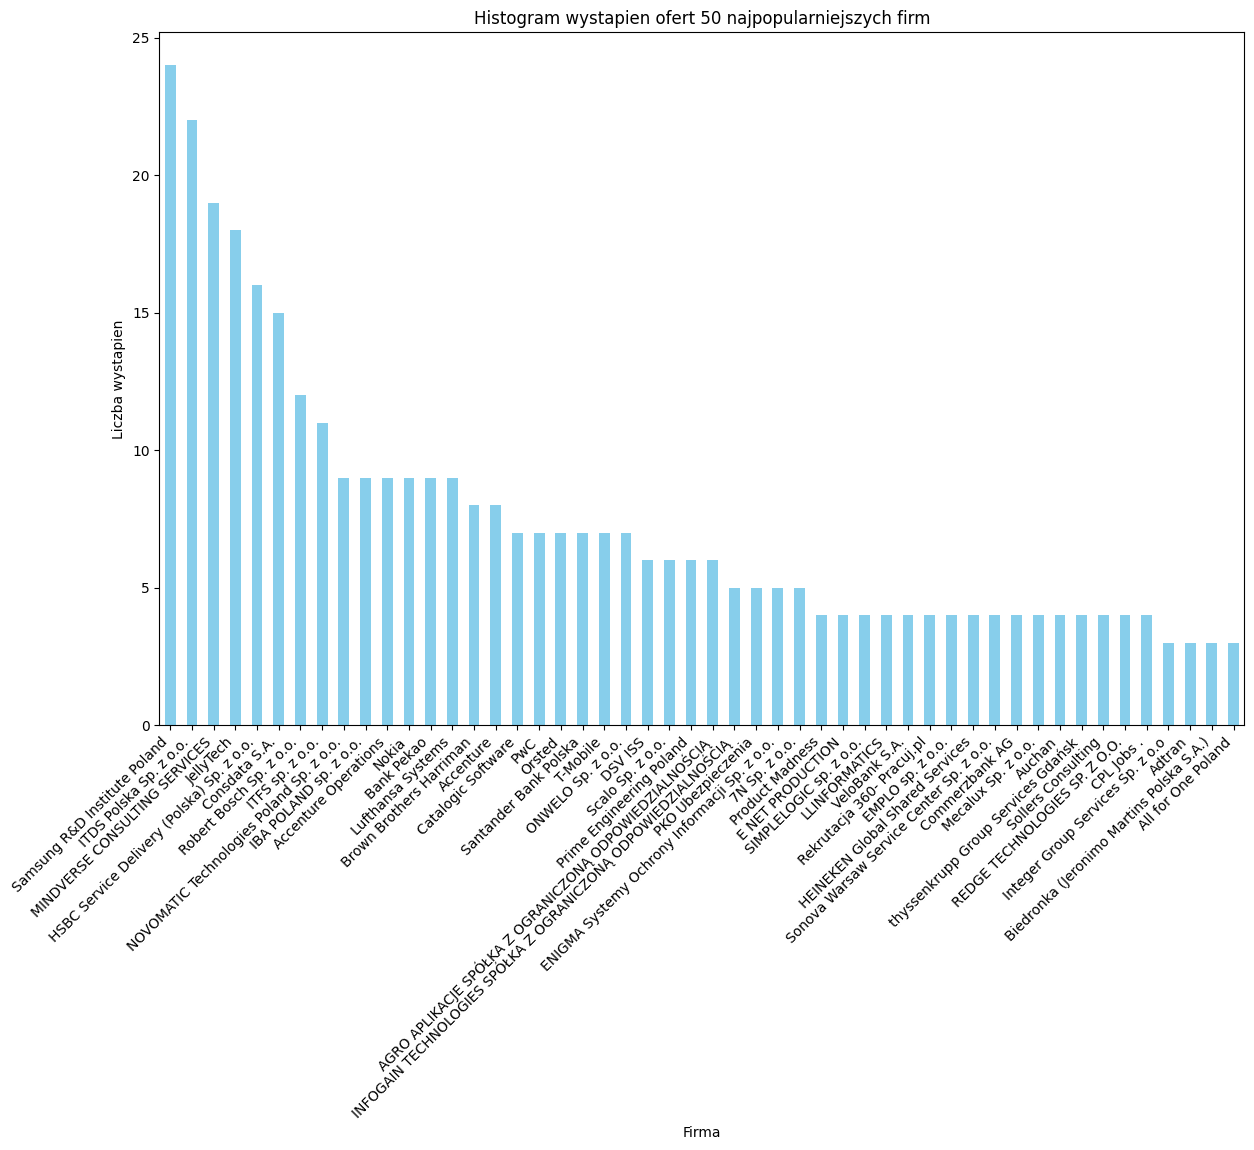

In [54]:
plt.figure(figsize=(14,9))
filtered_company_counts.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Firma')
plt.ylabel('Liczba wystapien')
plt.title('Histogram wystapien ofert 50 najpopularniejszych firm')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.show()

# Used technologies analysis

In [182]:
nan_rows_count = jobs_df[['Used Technologies']].isna().sum().sum()
print("Number of offers with MISSING technologies: " + str(nan_rows_count))
print("Displaying only offers that have the mentioned technologies")
jobs_df[jobs_df['Used Technologies'].notna()][['Position', 'Company','Used Technologies','Salary']]

Number of offers with MISSING technologies: 304
Displaying only offers that have the mentioned technologies


,Position,Company,Used Technologies,Salary
0,Embedded Software Engineer,Fluke Corportaion,"{'C': 'regular', 'C++': 'regular', 'Linux': 'r...",13000 18000
1,Azure Platform Engineer (AI Department),Procter & Gamble,"{'Microsoft Azure': 'advanced', 'Python': 'adv...",-
2,.NET Developer,UN7,{'.Net': 'advanced'},20000 28000
3,Spec. Projektant Robotyzacji Procesów,Credit Agricole Bank Polska S.A.,"{'C#': 'regular', 'VB.Net': 'regular', 'Java':...",-
4,HT Functional Consultant with ERP Industry Sol...,Accenture,"{'English': 'master', 'ERP': 'advanced', 'Prob...",-
...,...,...,...,...
848,Architekt systemowy,ALTEN Polska,"Java, Docker, Kubernetes, Devops, GOSU",-
849,Remote Python Developer,SQ3 Partners,"Python, Angielski, (C1), Polski, (NATIVE)",18568 21456
850,Cloud DevOps,Hitachi Energy,"DevOps, Linux, Windows, VMware, Docker, Kubern...",19000 28000
851,Kubernetes Engineer,C.H. Robinson,"Kubernetes, Terraform, Docker, Linux, Azure, C...",20000 25000


In [56]:
jobs_df['Used Technologies']

0      {'C': 'regular', 'C++': 'regular', 'Linux': 'r...
1      {'Microsoft Azure': 'advanced', 'Python': 'adv...
2                                   {'.Net': 'advanced'}
3      {'C#': 'regular', 'VB.Net': 'regular', 'Java':...
4      {'English': 'master', 'ERP': 'advanced', 'Prob...
                             ...                        
848               Java, Docker, Kubernetes, Devops, GOSU
849            Python, Angielski, (C1), Polski, (NATIVE)
850    DevOps, Linux, Windows, VMware, Docker, Kubern...
851    Kubernetes, Terraform, Docker, Linux, Azure, C...
852    Python, Django, PostgreSQL, API, AWS, Cloud, G...
Name: Used Technologies, Length: 853, dtype: object

In [61]:
def parse_used_technologies(tech_string):
    try:
        tech_dict = ast.literal_eval(tech_string)
        return tech_dict
    except (ValueError, SyntaxError):
        return None

In [62]:
jobs_df['Parsed technologies'] = jobs_df['Used Technologies'].apply(parse_used_technologies)

In [68]:
type(jobs_df['Parsed technologies'][0])

dict

In [69]:
type(jobs_df['Used Technologies'][0])

str

In [70]:
unique_skills = set()
for skills in jobs_df['Parsed technologies']:
    if skills:
        unique_skills.update(skills.keys())

print("Wszystkie unikalne umiejętności:")
print(unique_skills)

Wszystkie unikalne umiejętności:
{'QA Automation', 'Yocto', 'VR Tools', 'Leadership', 'RPA', 'Jenkins', 'Laravel', 'PHP', 'Git', 'Prometheus', 'ASP.NET Core', 'Firestore', 'Polish', 'SEO', 'Windows 11', 'Agile', 'Project Management', 'Vue.js', 'DAX', 'CSS', 'UiPath', 'RFC', 'SAP PI/PO', 'SAP CPI', 'APL', 'PHP 7.x', 'Clean Code', 'Office 365', 'Fixed Income space', 'Kotlin', 'Blutooth Low Energy', 'Team Management', 'ABAP OData', 'AAD', 'SASS', 'Azure', 'NumPy', 'Oracle DB', 'C', 'PySpark', 'SAP ECC 6.0', 'CI/CD', 'ABAP', 'SDD', 'C#', 'MySQL', 'Packer', 'SAP Customer Activity Repository (CAR)', 'Microsoft Azure Cloud', 'FortiGate', 'Google Cloud Platform', 'JQL', 'Scala', 'CI', 'PL/SQL', 'Bootstrap', 'Docker / Kubernetes', 'ETL', 'HTML5 / CSS3', 'Machine Learning', 'GraphQL API', 'Go', 'Lean', 'Python/Bash', 'Microservices', 'GCP', 'DevOps', 'Bash', 'Cloud DevOps', 'NoSQL', 'CRM/ERP', 'Dynamics 365', 'Prototyping', 'stakeholder management', 'Communication Skills', 'Terraform/Ansible', '